# DS-SF-36 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
df.shape[0]

400

Answer: There are 400 observations in the dataset.

> ### Question 2.  Create a summary table.

In [4]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [5]:
df['admit'].sum() # this could also be calculated by multiplying the admit mean by the count: .3175*400=127 admitted students

127

In [6]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


Summary:
- 127 applicants were admitted, this is 32% of the applicants as noted in the describe table under mean.  This is a decent class distribution.
- Highest GRE score is 800, highest GPA is 4.0.  Prestige ratings are 1,2,3 and 4. 
- Missing 2 GRE scores, 2 GPA scores, and 1 prestige score.  Not missing any admit decisions.
- GRE, GPA, and prestige do NOT seem well correlated with admittance.  Interesting to see that prestige of alma mater is negatively correlated with GRE score.  It's not surprising to me that there is a slight negative correlation between prestige and GPA, because at the stronger schools, it may be more difficult for students to get a high GPA because there are strong students/higher competition for good grades.

> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [7]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

In [8]:
df.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

Answer: It makes sense the GRE has a larger variance than GPA because there is a larger spread of values for GRE (min=220, max=800) relative to GPA (min=2.26, max=4.0.

> ### Question 4.  Drop data points with missing data.

In [9]:
df_dropna=df.dropna()

In [10]:
df_dropna

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


Rather than altering the original dataframe, named the new dataframe after dropping the points with missing data, "df_dropna".

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [11]:
df_dropna.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [12]:
df_dropna.isnull().sum() # NAs in the new "df_dropna" dataframe = 0!

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [13]:
df.isnull().sum() # NAs in original dataframe = 5.  As confirmed above, these 5 missing values were across 3 entries.

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

Answer: As shown by leveraging the describe function on the updated dataframe, we now have an equal count of entries across admit, GRE, GPA, and prestige (397).  Therefore, the points with missing data have been removed. 

I confirmed this by counting the number of NaNs in each column of the new "df_dropna" dataframe, and it was 0.  Therefore, we know that there are no more missing data points in our "df_dropna" dataframe.

Out of curiousity, I checked on how many data points were missing in the original dataframe (df) and it was a total of 5.  Therefore, these 5 missing points must have been across 3 entries (400 total entries - 397 = 3).

> ### Question 6.  Create boxplots for `gre` and `gpa`.

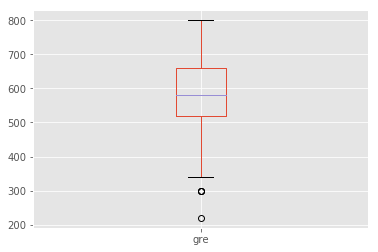

In [14]:
df_dropna[['gre'] ].boxplot(figsize = (8, 8))

In [15]:
print df_dropna.gre.quantile(.75)
print df_dropna.gre.quantile(.5)
print df_dropna.gre.quantile(.25)

660.0
580.0
520.0


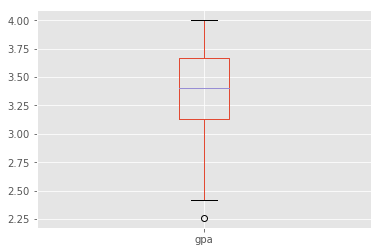

In [16]:
df_dropna[ ['gpa'] ].boxplot(figsize = (8, 8))

In [17]:
print df_dropna.gpa.quantile(.75)
print df_dropna.gpa.quantile(.5)
print df_dropna.gpa.quantile(.25)

3.67
3.4
3.13


> ### Question 7.  What do boxplots show?

Answer: The box plots show the following: 
- GRE boxplot: There are (what seems to be) two outliers on the low end (~300, 220).  The data is asymmetrically distributed with the third quartile being larger than the 1st (this is confirmed by computing the quantiles).  The median is 580.  
- GPA boxplot: There is one outlier on the low end.  The data is symmetrically distributed (confired by computing the quantiles), with the median at 3.4.

> ### Question 8.  Plot the distribution of each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d5d67d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b00b2d0>]], dtype=object)

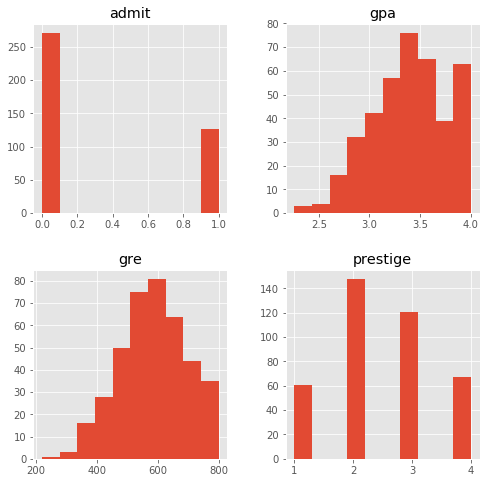

In [18]:
df_dropna[ ['gre', 'gpa','prestige', 'admit'] ].hist(figsize = (8, 8))

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

GRE: no, GRE is not normally distributed.  It has a longer tail to the left, which may be due to the outliers. I  removed the outliers, confirmed that the outliers are removed (should be 393 rows) and reploted below.  The median shifted up from 560 to 580, the 3rd quartile moved from 660 to 680, and the distribution looks more normal (see scatter matrix).  However, it will not be a perfect normal distribution as there is high frequency of entries with an 800 score, which is the max.  This truncates teh tail at the right.

GPA: no, GPA has a longer tail to the left, which may be due to outliers, which I removed. 

Finally - I used a scatter matrixs to compare the GPA and GRE plots before and after the outliers were removed. Removing the outliers made the plots more like normal distributions the but the right tail of both gpa and gre is truncated given that there is a maximum for each of these measures, and a signficant number of applicants had these high scores.

Remove outliers for GRE below, in new dataframe df_noo:

In [19]:
Q1 = df_dropna.gre.quantile(0.25)
Q3 = df_dropna.gre.quantile(0.75)
IQR = Q3 - Q1
IQR

140.0

In [20]:
df_dropna[df_dropna.gre < Q1 - 1.5 * IQR].shape[0]

4

In [21]:
df_dropna[df_dropna.gre < Q1 - 1.5 * IQR]

,admit,gre,gpa,prestige
71,0,300.0,2.92,4.0
179,0,300.0,3.01,3.0
304,0,220.0,2.83,3.0
315,1,300.0,2.84,2.0


In [22]:
df_dropna[df_dropna.gre > Q3 + 1.5 * IQR].shape[0]

0

In [23]:
#noo is for "NO Outliers"
df_noo=df_dropna.drop(df_dropna[df_dropna.gre < Q1 - 1.5 * IQR].index, inplace = False)

In [24]:
df_noo.shape[0]

393

In [25]:
Q1 = df_dropna.gre.quantile(0.25)
Q3 = df_dropna.gre.quantile(0.75)
IQR = Q3 - Q1
IQR

140.0

In [26]:
print df_noo.gre.quantile(.75)
print df_noo.gre.quantile(.5)
print df_noo.gre.quantile(.25)

680.0
580.0
520.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b141b90>]], dtype=object)

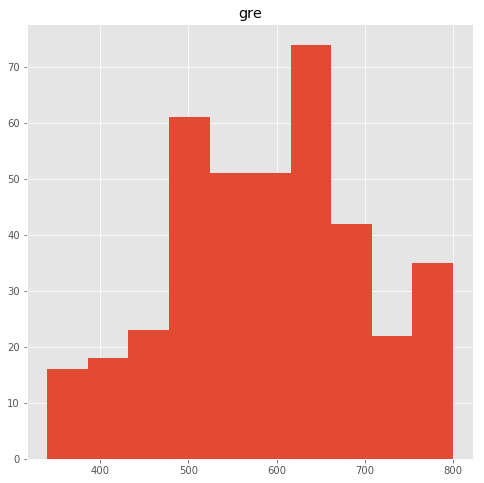

In [27]:
df_noo[ ['gre'] ].hist(figsize = (8, 8))

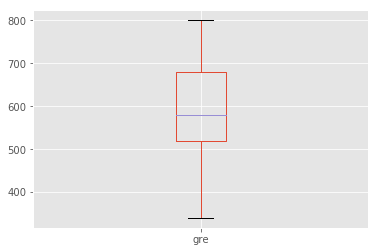

In [28]:
df_noo[['gre'] ].boxplot(figsize = (8, 8))

Remove outliers for GPA below, via updating the dataframe df_noo:

In [29]:
Q1 = df_noo.gpa.quantile(0.25)
Q3 = df_noo.gpa.quantile(0.75)
IQR = Q3 - Q1
IQR

0.5299999999999998

In [30]:
df_noo[df_noo.gpa < Q1 - 1.5 * IQR].shape[0]

1

In [31]:
df_noo[df_noo.gpa < Q1 - 1.5 * IQR]

,admit,gre,gpa,prestige
289,0,420.0,2.26,4.0


In [32]:
df_noo[df_noo.gpa > Q3 + 1.5 * IQR].shape[0]

0

In [33]:
df_noo.drop(df_noo[df_noo.gpa < Q1 - 1.5 * IQR].index, inplace = True)

In [34]:
df_noo.shape[0]

392

In [40]:
print df_noo.gpa.quantile(.75)
print df_noo.gpa.quantile(.5)
print df_noo.gpa.quantile(.25)

3.67
3.4
3.14


Confirmed that the outlier has been removed, and the qunatiles have remained the same, this makes sense as we only removed one value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b045cd0>]], dtype=object)

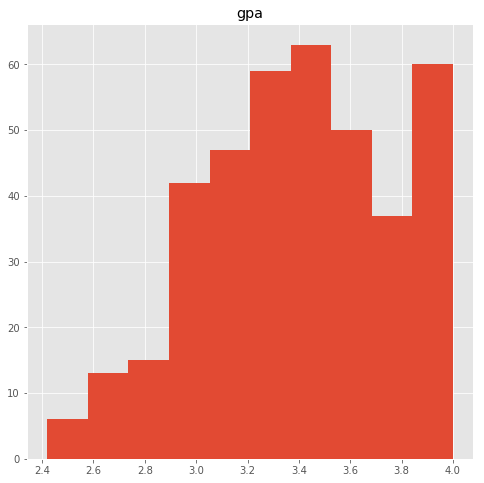

In [42]:
df_noo[ ['gpa'] ].hist(figsize = (8, 8))

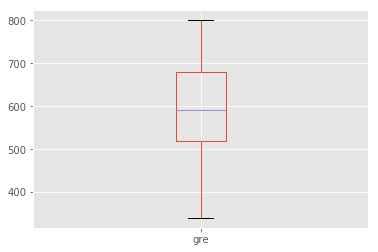

In [43]:
df_noo[['gre'] ].boxplot(figsize = (8, 8))

Compared scatter matrices from before and after the outliers were removed below.  In summary, removing the outliers made the plots more like normal distributions the but the right tail of both gpa and gre is truncated given that there is a maximum for each of these measures, and a signficant number of applicants had these high scores.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c519d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c901c10>]], dtype=object)

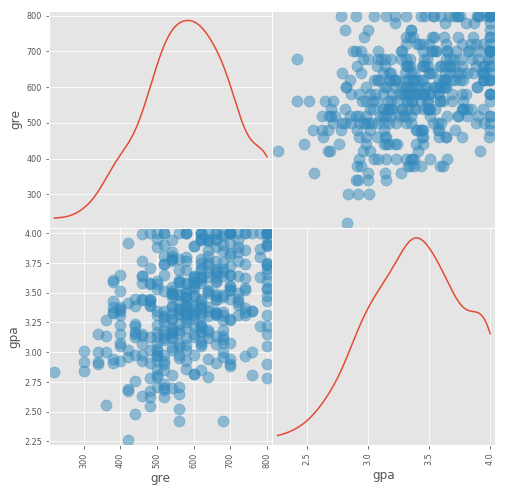

In [44]:
pd.tools.plotting.scatter_matrix(df_dropna[ ['gre', 'gpa'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bda84d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bff5e90>]], dtype=object)

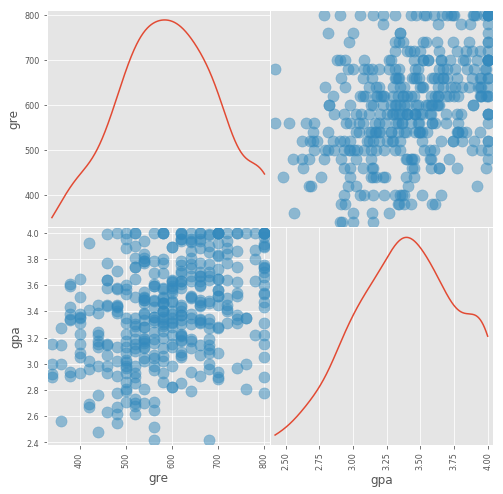

In [39]:
pd.tools.plotting.scatter_matrix(df_noo[ ['gre', 'gpa'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

> ### Question 10.  Create a correlation matrix for the dataset.

In [45]:
df_noo.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181976,0.172239,-0.237270
gre,0.181976,1.000000,0.357025,-0.109055
gpa,0.172239,0.357025,1.000000,-0.043483
prestige,-0.237270,-0.109055,-0.043483,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: GPA and GRE are potentially colinear, with a correlation of 0.35.

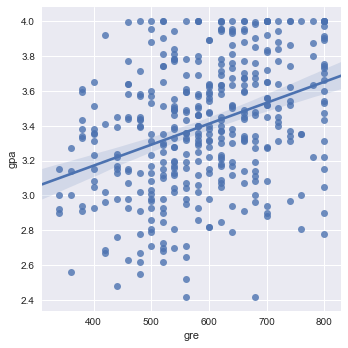

In [51]:
sns.lmplot(x = 'gre', y = 'gpa', data = df_noo)

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: It is strange to me that prestige of undergraduate schools has a negative correlation with graduate school admission.  It is possible that there is a relationship between prestige and one of the other variables causing this effect.  I'd like to run a regression and systematically remove variables to assess if there is multicolinearity at play. 

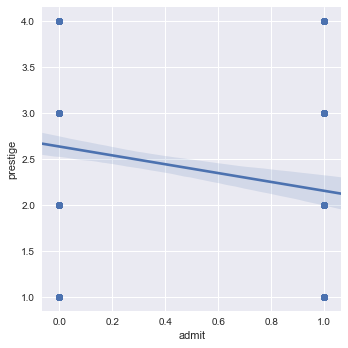

In [54]:
sns.lmplot(x = 'admit', y = 'prestige', data = df_noo)

> ### Question 13.  What is your hypothesis?

Answer: My hypothesis is that there is a positive correlation bewteen prestige and admittance that we will see when we remove one or both of the other variables.